<a href="https://colab.research.google.com/github/operiojrr/VSU-Computational-Materials-Science-Research-Data-Visualization-and-Analysis/blob/main/ElasticProperties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELASTIC PROPERTIES

Operio, Jericho Ross R.

VSU Theoretical and Computational Research Group

This notebook presents the code used to plot the different elastic moduli that describe the elastic properties and, ultimately, the mechanical properties of bulk materials.

I. COMBINED COMPARATIVE POLAR PLOTS

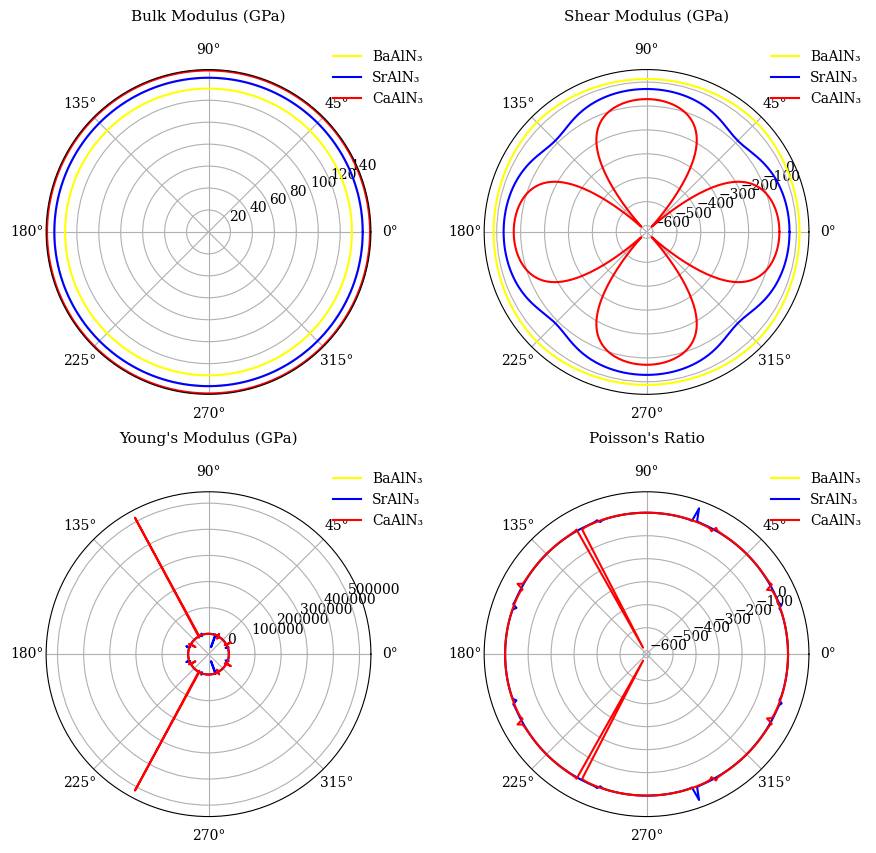

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Elastic constants in GPa for each compound; input manually from your elastic.out file
compounds = {
    "BaAlN₃": {"C11": 218.54063, "C12": 86.76863, "C44": 13.00553}, # change the material name and values accordingly
    "SrAlN₃": {"C11": 253.89064, "C12": 83.91009, "C44": -28.73079},
    "CaAlN₃": {"C11": 271.43759, "C12": 85.05095, "C44": -70.99232}
}

theta = np.linspace(0, 2*np.pi, 360)

def get_moduli(C11, C12, C44):
    if C44 == 0:
        C44 = 1e-6  # avoid div by zero
    S11 = (C11 + C12) / ((C11 - C12)*(C11 + 2*C12))
    S12 = -C12 / ((C11 - C12)*(C11 + 2*C12))
    S44 = 1 / C44

    cos2 = np.cos(theta)**2
    sin2 = np.sin(theta)**2

    B = np.full_like(theta, (C11 + 2*C12)/3)
    E = 1 / (S11 - 2*(S11 - S12 - 0.5*S44)*cos2*sin2)
    G = 1 / (4*(S11 - S12 - 0.5*S44)*cos2*sin2 + S44)
    ν = -E * (S12 + (S11 - S12 - 0.5*S44)*cos2*sin2)

    return B, G, E, ν

# Plotting setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 9))

colors = {'BaAlN₃': 'yellow', 'SrAlN₃': 'blue', 'CaAlN₃': 'red'}

for label, const in compounds.items():
    C11, C12, C44 = const["C11"], const["C12"], const["C44"]
    B, G, E, ν = get_moduli(C11, C12, C44)
    axs[0, 0].plot(theta, B, label=label, color=colors[label])
    axs[0, 1].plot(theta, G, label=label, color=colors[label])
    axs[1, 0].plot(theta, E, label=label, color=colors[label])
    axs[1, 1].plot(theta, ν, label=label, color=colors[label])

# Manually add titles *above* the 90° tick in each subplot
axs[0, 0].text(0.5, 1.15, "Bulk Modulus (GPa)", transform=axs[0, 0].transAxes, ha='center', fontsize=11)
axs[0, 1].text(0.5, 1.15, "Shear Modulus (GPa)", transform=axs[0, 1].transAxes, ha='center', fontsize=11)
axs[1, 0].text(0.5, 1.15, "Young's Modulus (GPa)", transform=axs[1, 0].transAxes, ha='center', fontsize=11)
axs[1, 1].text(0.5, 1.15, "Poisson's Ratio", transform=axs[1, 1].transAxes, ha='center', fontsize=11)

# Add legends
for ax in axs.flat:
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), frameon=False)

# Overall title and layout
plt.subplots_adjust(top=0.88, bottom=0.05, hspace=0.3, wspace=0.3)
plt.savefig('elastic-anisotropy.png', dpi=300)
plt.show()


II. SINGLE POLAR PLOTS

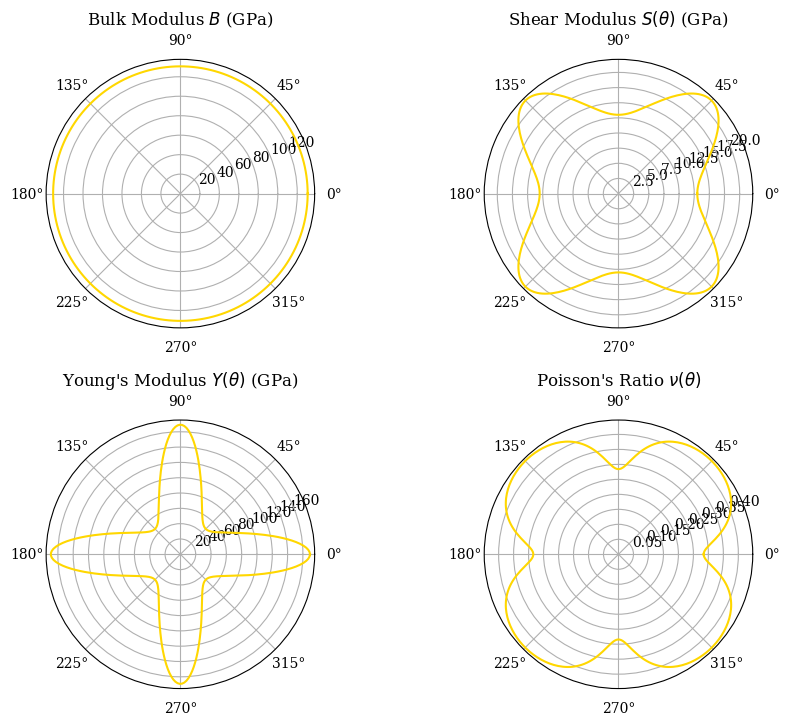

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# input data (filename, elastic constants, elastic compliance constants) manually
BaAlN3 = {
    "C11": 2185.40632, "C12":  867.68625, "C44":  130.05531,
    "S11":    0.59094, "S12":   -0.16795, "S44":   7.68904
}

# Unit conversions: Cij (kbar→GPa), Sij (1/Mbar→1/GPa)
for key in ["C11", "C12", "C44"]:
    BaAlN3[key] *= 0.1
for key in ["S11", "S12", "S44"]:
    BaAlN3[key] *= 0.01

# Angles for plotting
theta = np.linspace(0, 2*np.pi, 360)
cos2, sin2 = np.cos(theta)**2, np.sin(theta)**2

# Function to compute directional moduli
def get_moduli(C11, C12, C44, S11, S12, S44):
    B = np.full_like(theta, (C11 + 2*C12) / 3.0)

    denom_E = S11 - 2*(S11 - S12 - 0.5*S44) * cos2 * sin2
    denom_E = np.where(denom_E <= 0, np.nan, denom_E)
    E = 1.0 / denom_E

    denom_G = 4*(S11 - S12 - 0.5*S44) * cos2 * sin2 + S44
    denom_G = np.where(denom_G <= 0, np.nan, denom_G)
    G = 1.0 / denom_G

    ν = -E * (S12 + (S11 - S12 - 0.5*S44) * cos2 * sin2)

    return B, G, E, ν

# Plotting
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'DejaVu Serif'
})

fig, axs = plt.subplots(2, 2,
                        subplot_kw={'projection': 'polar'},
                        figsize=(10, 8))

color = 'gold'

B, G, E, ν = get_moduli(
    BaAlN3["C11"], BaAlN3["C12"], BaAlN3["C44"],
    BaAlN3["S11"], BaAlN3["S12"], BaAlN3["S44"]
)

axs[0, 0].plot(theta, B, label='BaAlN₃', color=color)
axs[0, 1].plot(theta, G, label='BaAlN₃', color=color)
axs[1, 0].plot(theta, E, label='BaAlN₃', color=color)
axs[1, 1].plot(theta, ν, label='BaAlN₃', color=color)

axs[0, 0].set_title("Bulk Modulus $B$ (GPa)", pad=25)
axs[0, 1].set_title("Shear Modulus $S(\\theta)$ (GPa)", pad=25)
axs[1, 0].set_title("Young's Modulus $Y(\\theta)$ (GPa)", pad=25)
axs[1, 1].set_title("Poisson's Ratio $\\nu(\\theta)$", pad=25)

for ax in axs.flat:
    ax.legend().remove()

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.savefig("BaAlN3-mechanical-polar-plot", dpi=300)
plt.show()
